In [ ]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider

input Variables


1.   Serial No. - Unique row ID

2.   GRE Scores - Out of 340

3.   TOEFL Scores - Out of 120

4.   University Rating - Out of 5

5.   Statement of Purpose - Strength Out of 5

6.   Letter of Recommendation - Strength Out of 5

7.   Undergraduate GPA - Out of 10

8.  Research Experience - Either 0 or 1




In [ ]:
# file_id = '1DLKzQkF6Pf2OB_IZHpZMyq4W6qhgdwXK'
# url = f'https://drive.google.com/uc?id={file_id}'
# output = 'filename.csv'

# gdown.download(url, output, quiet=True)

'filename.csv'

In [ ]:
df = pd.read_csv('/content/filename.csv')

Data understanding.

In [ ]:
df.shape

(400, 9)

In [ ]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


To see the descriptive statistics of dataset

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


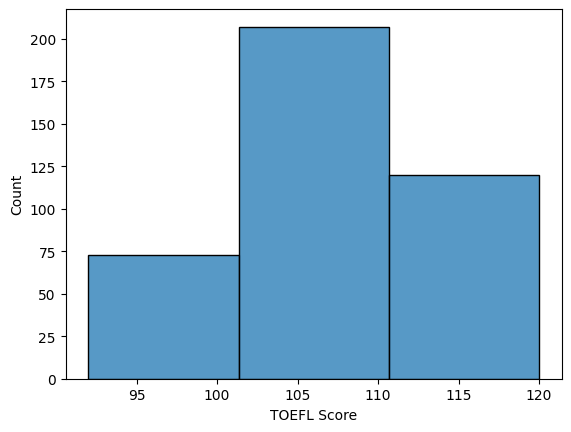

In [ ]:
sns.histplot(df["TOEFL Score"], binwidth = 10)
plt.show()

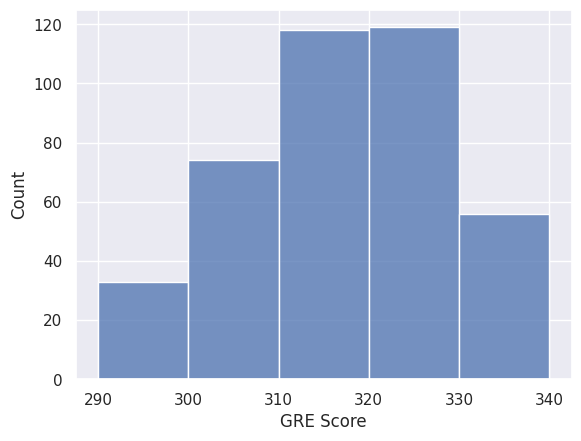

In [ ]:
sns.histplot(df["GRE Score"], binwidth = 10)
plt.show()

In [ ]:
df['Research'].value_counts().sort_values(ascending=False)

,count
Research,
1,219
0,181


In [ ]:
df['University Rating'].value_counts(ascending=True)

,count
University Rating,
1,26
5,60
4,74
2,107
3,133


In [ ]:
df['SOP'].value_counts(ascending=False)

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [ ]:
df['LOR'].value_counts(ascending=False)

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


In [ ]:
gre = df.groupby(['University Rating']).agg({'GRE Score':['mean', 'median']})
gre.reset_index()

University Rating   GRE Score       
                           mean median
0                 1  303.153846  300.5
1                 2  309.177570  309.0
2                 3  315.954887  317.0
3                 4  324.824324  325.5
4                 5  328.333333  330.0

In [ ]:
tofel= df.groupby(['University Rating']).agg({'TOEFL Score':['mean']})
tofel.reset_index()

,University Rating,TOEFL Score
,,mean
0,1,99.076923
1,2,103.523364
2,3,106.887218
3,4,111.824324
4,5,113.666667


In [ ]:
cgpa = df.groupby(['University Rating']).agg({'CGPA':['mean']})
cgpa.reset_index()

,University Rating,CGPA
,,mean
0,1,7.745769
1,2,8.183738
2,3,8.552256
3,4,9.021622
4,5,9.291167


In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


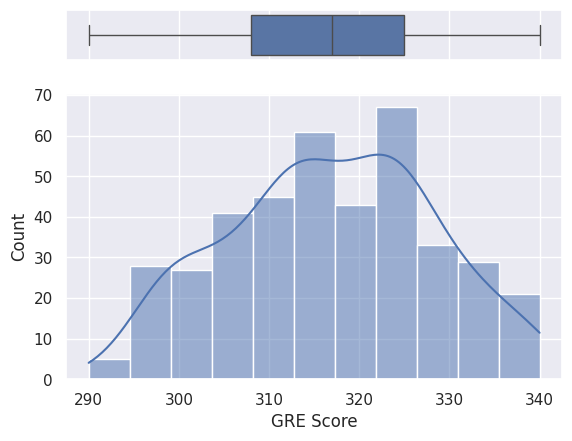

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='GRE Score', ax=ax_box,)
sns.histplot(data=df, x="GRE Score", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

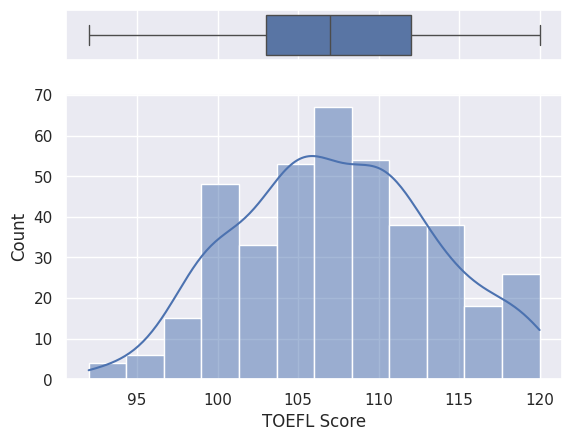

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='TOEFL Score', ax=ax_box)
sns.histplot(data=df, x="TOEFL Score", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

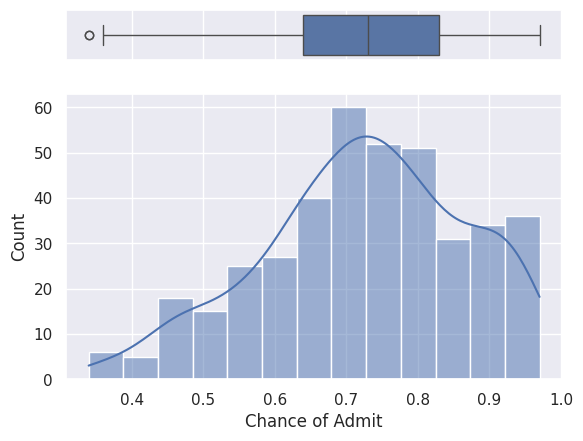

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='Chance of Admit', ax=ax_box)
sns.histplot(data=df, x="Chance of Admit", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()


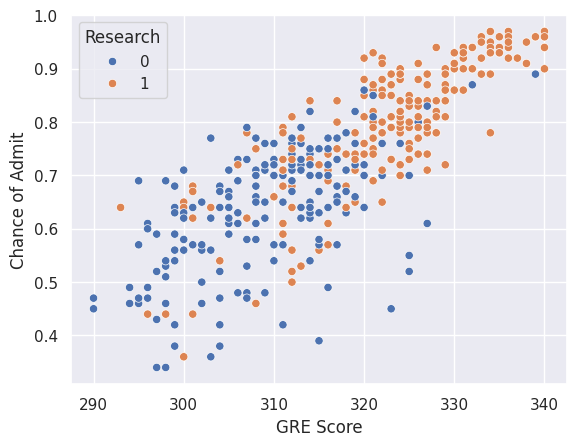

In [ ]:
sns.scatterplot(x='GRE Score',y='Chance of Admit',data=df,hue='Research')
plt.show()


From the above graph we can say that GRE score and Chance of admit has a linear relationship

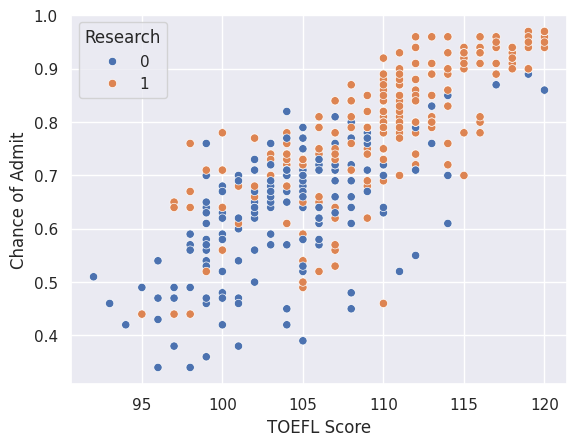

In [ ]:
sns.scatterplot(x='TOEFL Score',y='Chance of Admit',data=df,hue='Research')
plt.show()


From the above graph we can say that TOEFL score and Chance of admit has a linear relationship.

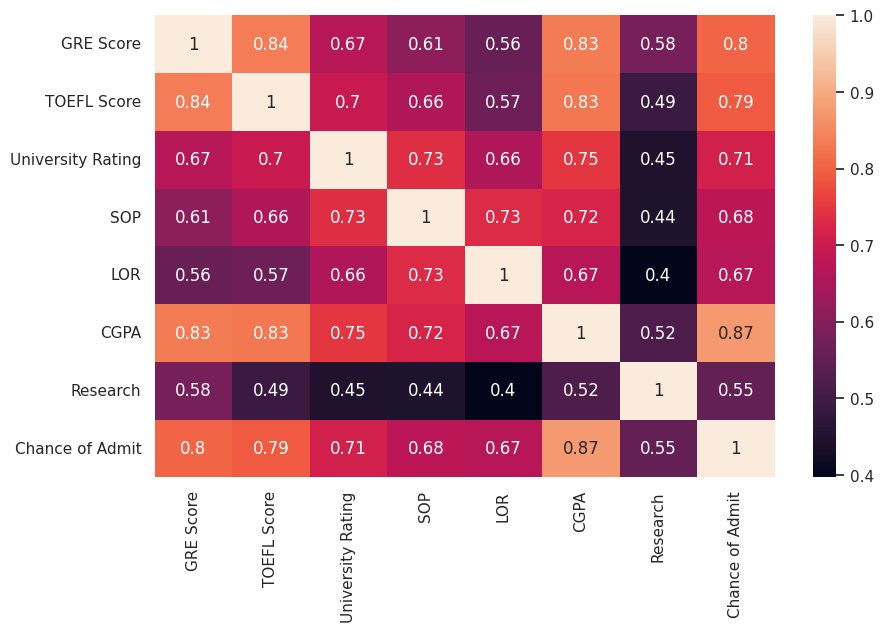

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

Almost all the variables are highly co-related so we need to do VIF to drop the columns.

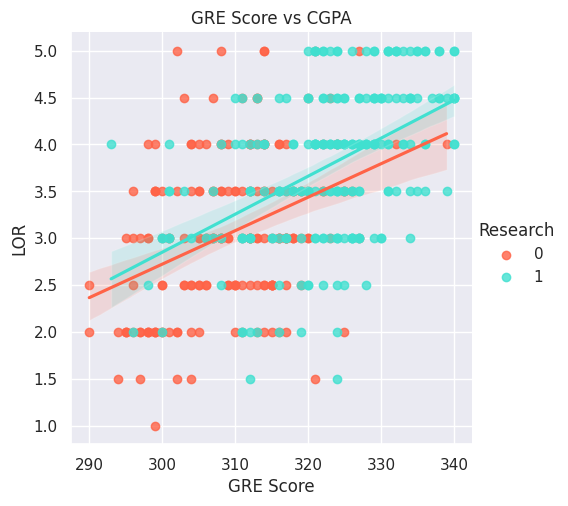

In [ ]:
fig = sns.lmplot(x="GRE Score", y="LOR", data=df, hue="Research", palette=["#FF6347", "#40E0D0"]  )
plt.title("GRE Score vs CGPA")
plt.show()

In [ ]:
# Creating the interactive regression plot function
def update_plot(selected_feature, selected_target):
    """
      Updates the Regression Plot

      Parameters:
        selected_feature(str):
        selected_target(str):

      Returns:
        None

    """
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=selected_feature, y=selected_target)
    plt.title(f'Regression Plot: {selected_feature} vs {selected_target}')
    plt.xlabel(selected_feature)
    plt.ylabel(selected_target)
    plt.grid(True)
    plt.show()

# Creating a dropdown menu for selecting features
feature_dropdown = Dropdown(
    options=df.columns.tolist(),
    value='GRE Score',
    description='Feature:',
)

target_dropdown = Dropdown(
    options=df.columns.tolist(),
    value='CGPA',
    description='Target:',
)

# Using interact to create the interactive plot
interact(update_plot, selected_feature=feature_dropdown, selected_target=target_dropdown)


interactive(children=(Dropdown(description='Feature:', options=('GRE Score', 'TOEFL Score', 'University Rating…

<function __main__.update_plot(selected_feature, selected_target)>

In [ ]:
# def update_histogram(selected_column, bin_num):
def update_histogram(selected_column, bin_width):
    plt.figure(figsize=(10, 6))
    # sns.histplot(df[selected_column], bins = bin_num, kde=True)
    sns.histplot(df[selected_column], binwidth=bin_width, kde=True)
    plt.title(f'Histogram of {selected_column}')
    plt.xlabel(selected_column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Creating slider for selecting bin width
binwidth_slider = IntSlider(
    value=10,
    min=1,
    max=50,
    step=1,
    description='Bin width:',
)
# binnum_slider = IntSlider(
#     value=10,
#     min=1,
#     max=50,
#     step=1,
#     description='Bin number:',
# )

column_dropdown = Dropdown(
    options=df.columns.tolist(),
    value='GRE Score',
    description='Column:',
)

# interact(update_histogram, selected_column=column_dropdown, bin_num=binnum_slider)
interact(update_histogram, selected_column=column_dropdown, bin_width=binwidth_slider)

interactive(children=(Dropdown(description='Column:', options=('GRE Score', 'TOEFL Score', 'University Rating'…

<function __main__.update_histogram(selected_column, bin_width)>